In [10]:
from google.colab import files


uploaded=files.upload()

Saving adult.csv to adult (1).csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df=pd.read_csv("adult.csv")
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
print(df.shape)
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Dataset Description**

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types.
The dataset contains missing values that are marked with a question mark character (?).
There are a total of 48,842 rows of data, and 3,620 with missing values, leaving 45,222 complete rows.

There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [16]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [18]:
sum(df.isin(['?']).sum())

6465

So we need to handle the missing data for the above columns only they are *workclass*,*occupation*,*native-country*

In [19]:
print('count of workclass instances:'"\n",df["workclass"].value_counts(),"\n")


count of workclass instances:
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 



In [20]:
print('count of workclass instances'"\n",df["occupation"].value_counts(),"\n")

count of workclass instances
 Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64 



In [21]:
print('count of workclass instances'"\n",df["native-country"].value_counts(),"\n")

count of workclass instances
 United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           4

*observations:* The missing data can be replaced by mean, medain, mode of the given column which gives near replacement of the data

In [22]:
mo= df.workclass.mode()[0]


In [23]:
mo_1=df.occupation.mode()[0]
mo_1

'Prof-specialty'

In [24]:
mo_2 = df["native-country"].mode()[0]
mo_2

'United-States'

In [25]:
df.workclass.replace('?','Private',inplace=True)
df["workclass"].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [26]:
df.occupation.replace('?','Prof-specialty',inplace=True)

df["occupation"].value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [27]:
df['native-country'].replace('?','United-States',inplace=True)

df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [28]:
df['income'].replace('>50K','0',inplace=True)

df['income'].replace('<=50K','1',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


In [29]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [30]:
catg_var=[]
num_var=[]

for col in df.columns:
        if (df[col].dtypes == 'object'):
            catg_var.append(col)
        else:
            num_var.append(col)

In [31]:
#defining an outliner function for finding out the outliers in the given dataset
def outlier(feature):
  Q1 = feature.quantile(0.25)

  Q3 = feature.quantile(0.75)

  IQR = Q3 - Q1

  Lower_quantile = Q1 - (1.5 * IQR)

  Upper_quantile = Q3 + (1.5 * IQR)

  outliner =[]
  for x in feature:
      if ((x> Upper_quantile) or (x<Lower_quantile)):
          outliner.append(x)
  print(' outliers for given column  are:', outliner)
  print("No.of outliers are:",len(outliner))

#### **Univariant Analysis for numerical columns**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


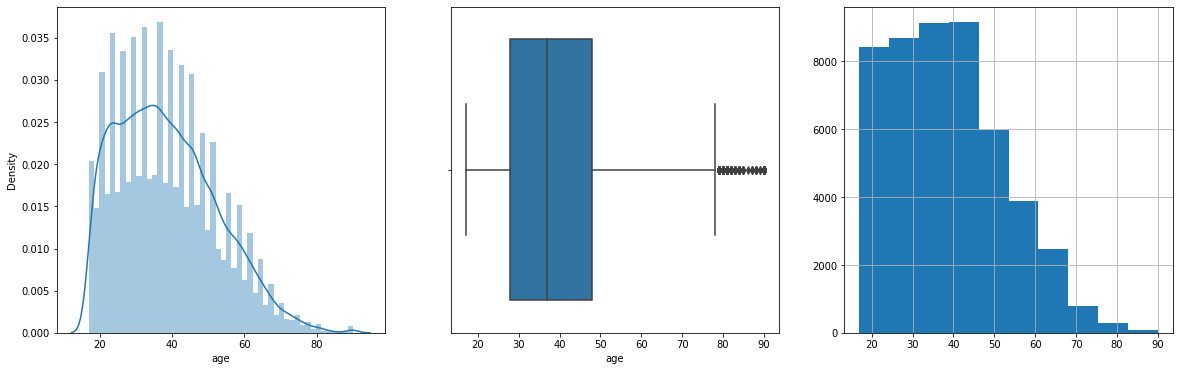

In [32]:
def visualize(feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(feature,kde = True)
    plt.subplot(1,3,2)
    sns.boxplot(feature)
    plt.subplot(1,3,3)
    feature.hist()
    
visualize(df.age)

**Observations**
we can see the *outliers* are present below the **upper limit** from the boxplot and from distplot we can observe the *medain* is between **30 to 40 years** we verify these assumptions later on

In [33]:
print(outlier(df['age']))
print(df['age'].median())

 outliers for given column  are: [79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]
No.of outliers are: 216
None
37.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


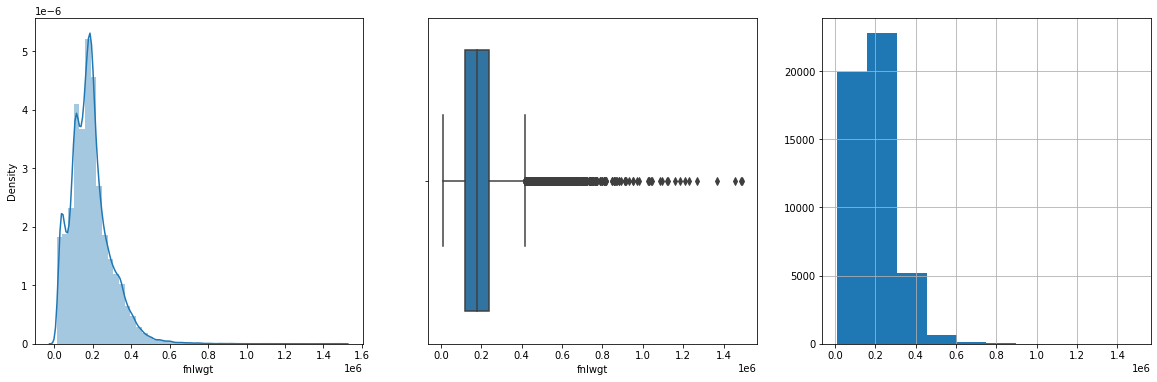

In [34]:
visualize(df['fnlwgt'])

**Observations**
we can see the *outliers* are present below the **upper limit** from the boxplot and from distplot we can observe the *medain* is around **0 to 0.2** we verify these assumptions later on

In [35]:
print(outlier(df['fnlwgt']))
print(df['fnlwgt'].median())

 outliers for given column  are: [444554, 432824, 465326, 445382, 479296, 428420, 456736, 537222, 513100, 447488, 512864, 500068, 446894, 599057, 479179, 471990, 457162, 455379, 542610, 479600, 448026, 437200, 419984, 652784, 573446, 453233, 662460, 426589, 629900, 499971, 450770, 481987, 420040, 478373, 486194, 509364, 632733, 504725, 560313, 651702, 644278, 535852, 445758, 452353, 475775, 455469, 522241, 427744, 420526, 473206, 427541, 581128, 444725, 608881, 490871, 430151, 431245, 451019, 430336, 433602, 437994, 436431, 914061, 624006, 510072, 484475, 505365, 593246, 714597, 418901, 816750, 491214, 446724, 552529, 454717, 425622, 575172, 475322, 622192, 420040, 566066, 493732, 427437, 427320, 614113, 445365, 472517, 459556, 548568, 565769, 429832, 424988, 426350, 789600, 424340, 447144, 864960, 497414, 471876, 723746, 427422, 421837, 692831, 535869, 433624, 638116, 467936, 698039, 427812, 472861, 449101, 677398, 464621, 547931, 497039, 451742, 420081, 460322, 666014, 474568, 452640

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


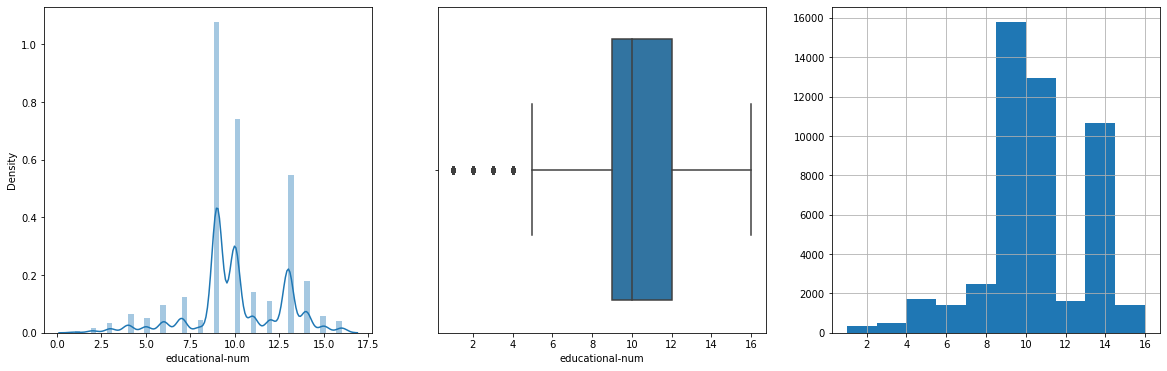

In [36]:
visualize(df['educational-num'])

**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is around **10** we verify these assumptions later on

In [37]:

print(outlier(df['educational-num']))
print(df['educational-num'].median())

 outliers for given column  are: [4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 4, 2, 4, 4, 3, 3, 2, 4, 3, 3, 4, 3, 3, 4, 4, 4, 1, 1, 4, 3, 2, 4, 4, 2, 3, 4, 4, 1, 4, 1, 4, 4, 4, 3, 4, 4, 3, 4, 3, 4, 2, 4, 2, 4, 4, 4, 3, 4, 2, 4, 4, 3, 3, 1, 1, 4, 3, 4, 2, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 1, 4, 4, 4, 3, 4, 2, 4, 2, 4, 4, 4, 4, 3, 3, 4, 4, 1, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 3, 4, 1, 2, 3, 4, 3, 2, 4, 1, 4, 2, 3, 3, 4, 4, 4, 1, 2, 2, 4, 3, 4, 4, 4, 4, 3, 2, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 2, 4, 4, 4, 3, 4, 3, 2, 4, 4, 3, 4, 2, 2, 4, 1, 2, 3, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 2, 3, 4, 3, 4, 4, 4, 3, 1, 2, 2, 2, 2, 3, 1, 2, 3, 4, 4, 4, 1, 1, 2, 4, 4, 4, 4, 2, 4, 3, 4, 3, 1, 3, 3, 1, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 2, 4, 4, 2, 4, 4, 3, 4, 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


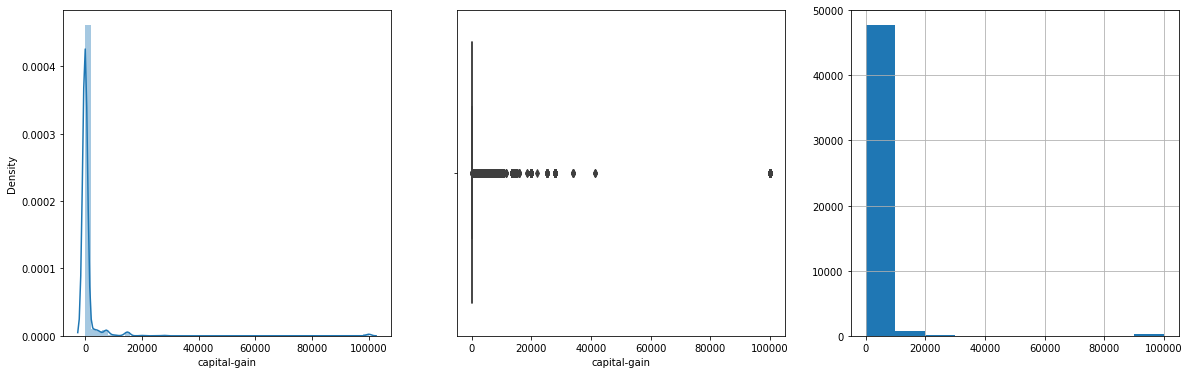

In [38]:
visualize(df['capital-gain'])

**Observations**
we can see the *outliers* are present below the **upper limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [39]:
print(outlier(df['capital-gain']))
print(df['capital-gain'].median())

 outliers for given column  are: [7688, 3103, 6418, 3103, 7298, 7688, 3908, 14084, 3103, 5178, 15024, 15024, 99999, 7688, 5178, 2597, 7688, 15024, 2907, 4650, 15024, 6497, 7688, 15024, 1055, 5013, 4650, 3103, 15024, 27828, 3103, 4934, 4064, 15024, 3674, 2174, 10605, 99999, 5178, 99999, 3418, 1055, 99999, 114, 2580, 3411, 2174, 2907, 4508, 27828, 4386, 15024, 15024, 2174, 5178, 8614, 7298, 3103, 13550, 2907, 5013, 6497, 7298, 7298, 7298, 7298, 15024, 1055, 15024, 6849, 2463, 7688, 5013, 99999, 2580, 2174, 99999, 3137, 2885, 2964, 7298, 1471, 5013, 5178, 4064, 10566, 2463, 2354, 7688, 1424, 99999, 5178, 1455, 7688, 7688, 3325, 3103, 4416, 15024, 27828, 25236, 3674, 3137, 99999, 8614, 594, 2105, 7298, 4787, 2829, 401, 7298, 4865, 15024, 15024, 1264, 15024, 6849, 15024, 7298, 7688, 1506, 99999, 4386, 99999, 99999, 5013, 4650, 3908, 594, 4386, 7688, 15024, 99999, 27828, 10520, 3103, 2354, 7298, 15024, 4934, 15024, 5178, 3103, 99999, 4865, 7688, 7688, 3464, 2653, 10520, 20051, 4101, 8614, 33

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


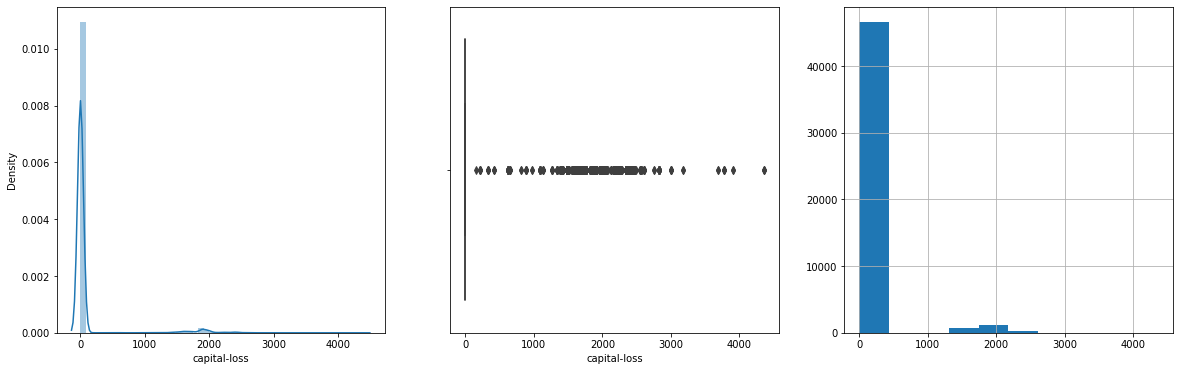

In [40]:
visualize(df['capital-loss'])

**Observations**
we can see the *outliers* are present below the **upper limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [41]:
print(outlier(df['capital-loss']))
print(df['capital-loss'].median())

 outliers for given column  are: [1721, 1876, 2415, 1887, 1887, 625, 1887, 1887, 1977, 2057, 1429, 1590, 2057, 1721, 1887, 1485, 1485, 1977, 1887, 1721, 1887, 2051, 2377, 1672, 1628, 1902, 1672, 1602, 1902, 1590, 1977, 1741, 1887, 2444, 1876, 1902, 1408, 1902, 2001, 2001, 2415, 2042, 1740, 1876, 1825, 1902, 1887, 1977, 1887, 1902, 1887, 1902, 2415, 1848, 1719, 3004, 1590, 1977, 1887, 625, 1977, 2001, 1902, 1977, 2179, 1902, 1573, 1429, 2205, 1258, 1977, 2339, 1887, 2339, 1726, 2258, 1672, 1590, 1887, 1340, 2415, 1602, 1504, 1887, 2415, 2559, 1977, 1848, 2258, 1902, 1887, 1668, 1974, 1977, 1741, 2205, 1980, 2051, 2377, 1902, 2444, 1564, 1408, 1902, 1977, 2547, 1902, 2002, 2057, 2001, 1977, 1977, 1628, 1902, 1876, 1848, 1719, 1669, 1902, 1902, 2339, 1902, 2339, 1902, 1887, 1902, 1887, 1719, 1429, 2001, 1485, 1902, 1980, 1504, 1887, 1902, 1977, 1617, 1741, 2051, 2205, 1980, 1902, 323, 1887, 2205, 1721, 1602, 1573, 1977, 2415, 3175, 1668, 2472, 1669, 1602, 2057, 1504, 2174, 1902, 1902, 157

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


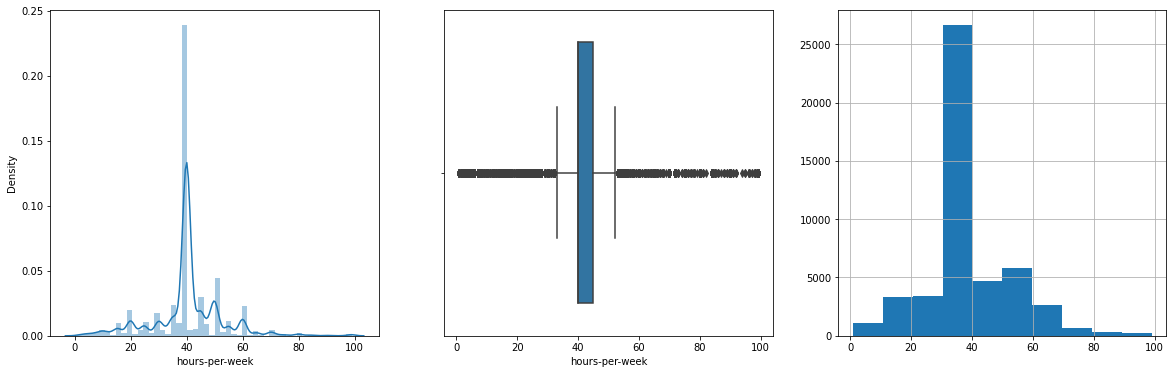

In [42]:
visualize(df['hours-per-week'])

**Observations**
we can see the *outliers* are present below the **upper limit and lower limit** from the boxplot and from distplot we can observe the *medain* is around **40** we verify these assumptions later on

In [43]:
print(outlier(df['hours-per-week']))
print(df['hours-per-week'].median())

 outliers for given column  are: [30, 30, 32, 10, 25, 30, 20, 6, 90, 20, 54, 60, 32, 18, 20, 24, 60, 54, 60, 20, 30, 10, 56, 10, 25, 20, 10, 18, 28, 16, 28, 20, 24, 60, 25, 30, 25, 60, 60, 22, 55, 30, 30, 30, 30, 14, 32, 20, 25, 30, 16, 25, 60, 55, 8, 55, 54, 20, 55, 12, 32, 32, 30, 60, 28, 60, 12, 32, 20, 70, 15, 20, 25, 30, 20, 75, 24, 60, 25, 55, 55, 32, 60, 16, 60, 84, 60, 25, 15, 60, 20, 55, 80, 30, 12, 84, 80, 60, 25, 25, 70, 60, 8, 68, 10, 15, 99, 55, 60, 16, 20, 25, 65, 55, 24, 70, 25, 30, 20, 20, 55, 5, 60, 60, 20, 55, 65, 60, 20, 10, 75, 20, 32, 28, 17, 30, 28, 60, 60, 55, 60, 10, 10, 65, 18, 60, 72, 12, 60, 30, 60, 20, 60, 60, 25, 60, 25, 8, 60, 54, 65, 30, 80, 30, 20, 28, 55, 55, 60, 56, 30, 30, 53, 10, 60, 30, 10, 25, 25, 20, 20, 20, 25, 55, 20, 32, 10, 29, 32, 75, 24, 20, 20, 70, 55, 55, 30, 25, 10, 80, 60, 16, 25, 65, 60, 60, 96, 25, 20, 55, 30, 28, 60, 55, 28, 21, 8, 60, 60, 15, 20, 10, 30, 25, 90, 15, 5, 16, 25, 60, 25, 25, 55, 10, 30, 8, 18, 3, 16, 20, 30, 60, 30, 25,

#### **Univariant analysis for categorical columns**

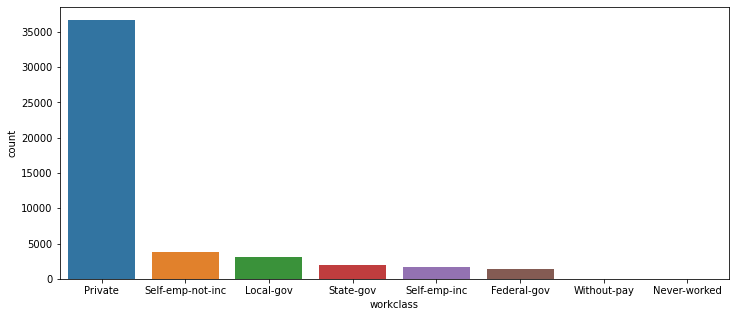

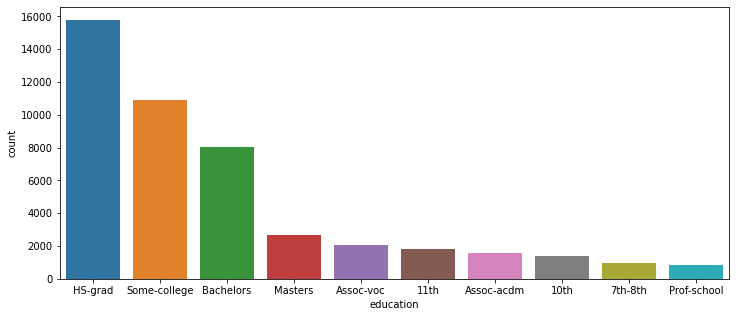

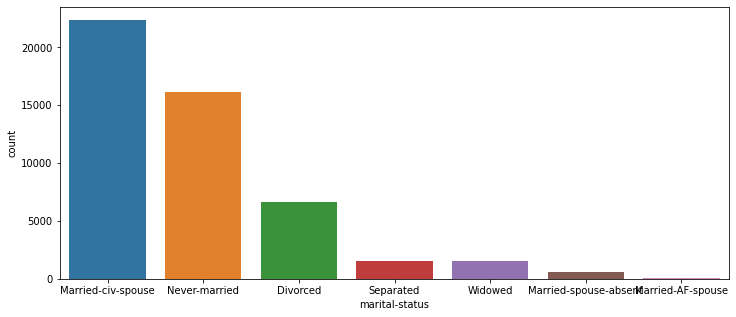

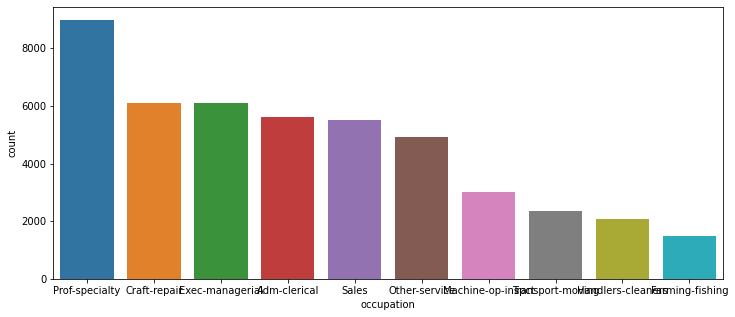

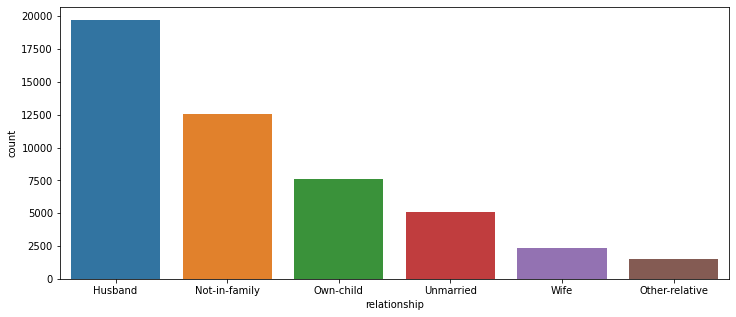

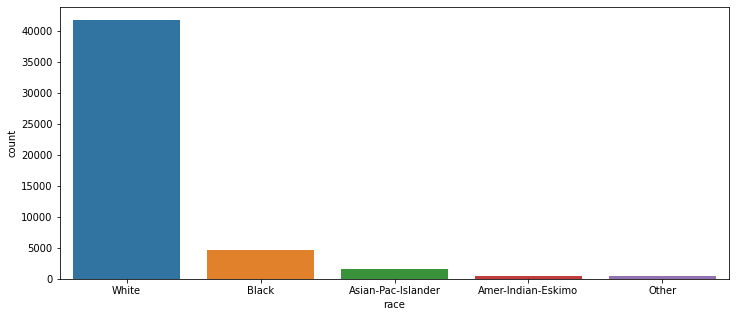

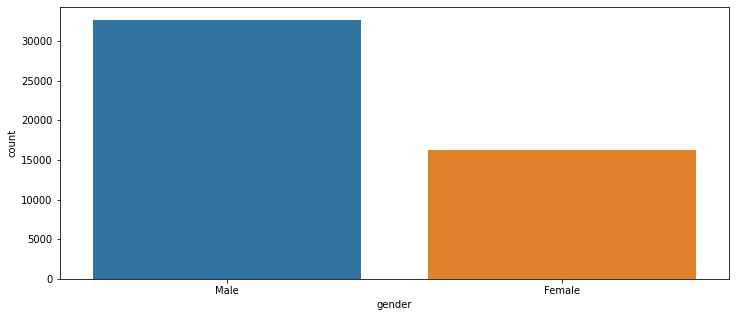

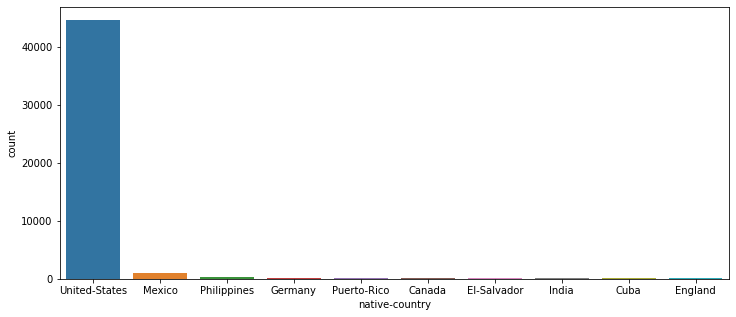

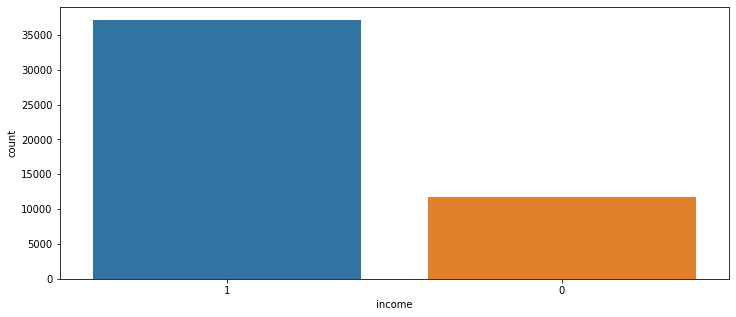

In [44]:
import warnings
warnings.filterwarnings("ignore")
for i in catg_var:
    plt.figure(figsize=(12,5))
    sns.countplot(df[i].dropna(), order=df[i].value_counts().iloc[:10].index)

### **Bivariant Analysis**

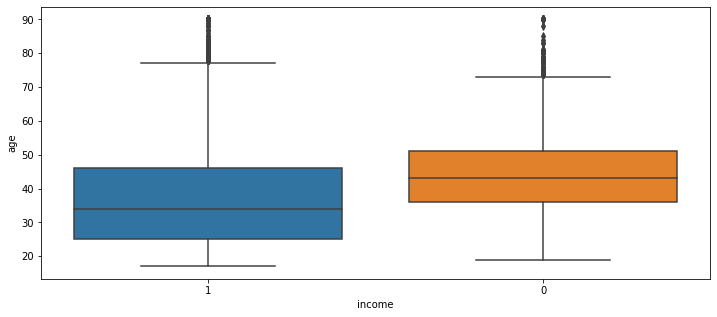

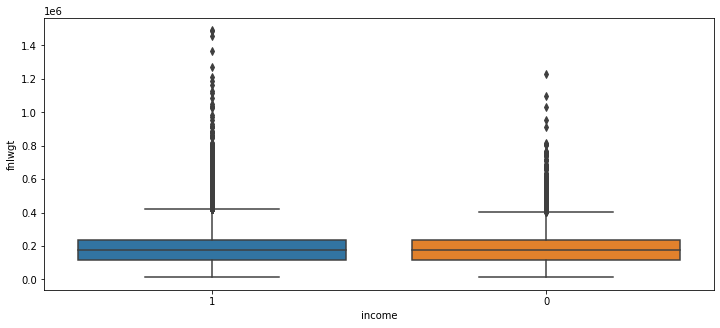

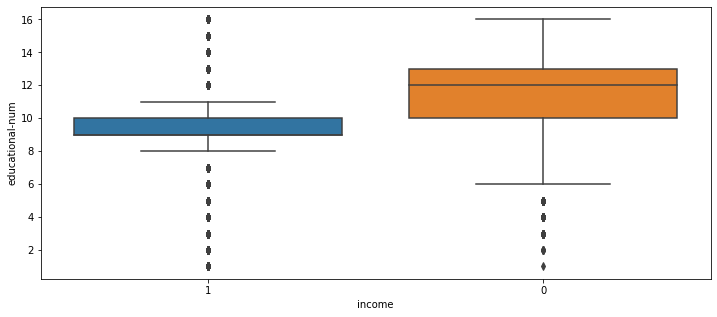

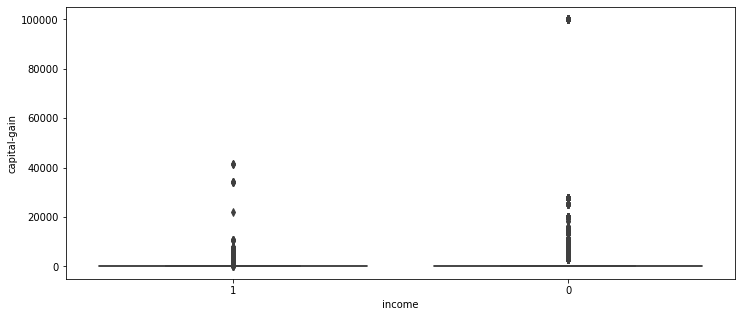

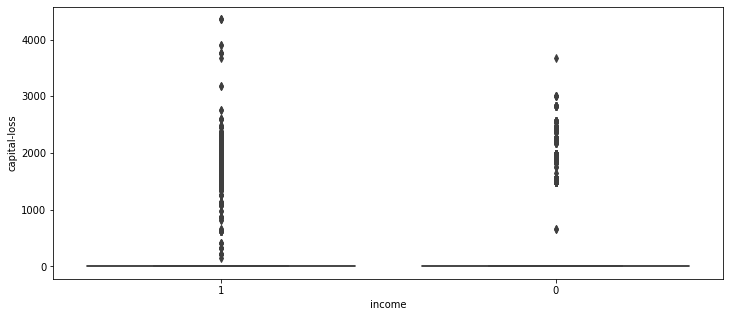

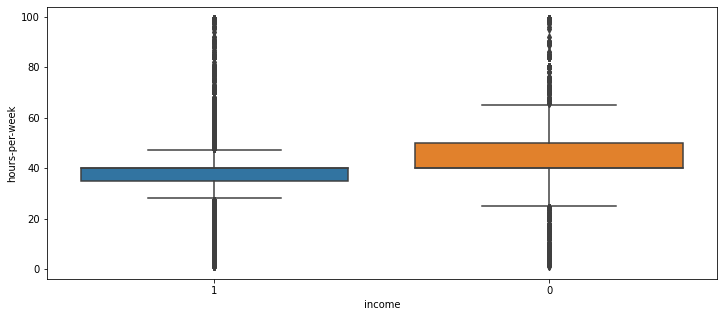

In [45]:
#numerical realtion between income and other numerical comlumns
for i in num_var:
    plt.figure(figsize=(12,5))
    sns.boxplot(x="income",y=i,data=df)

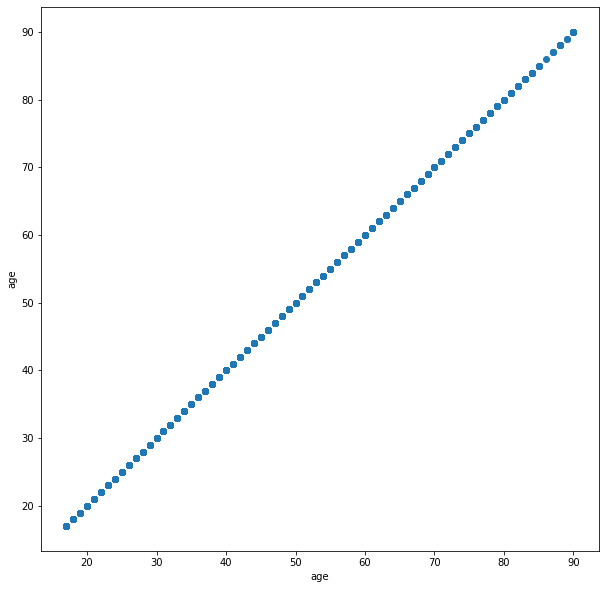

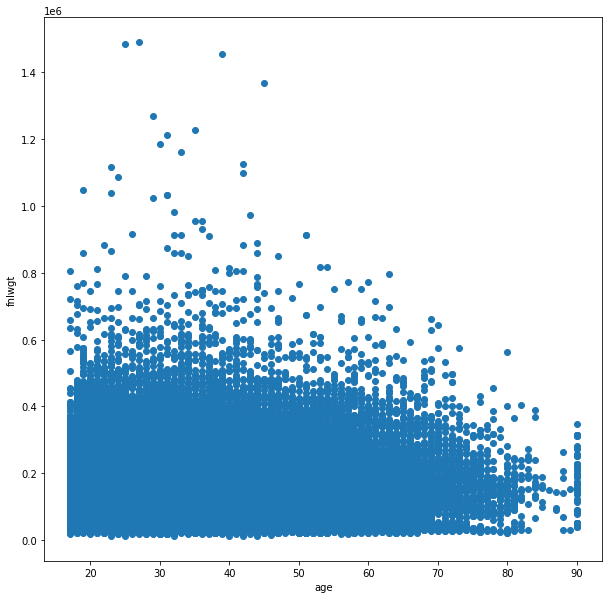

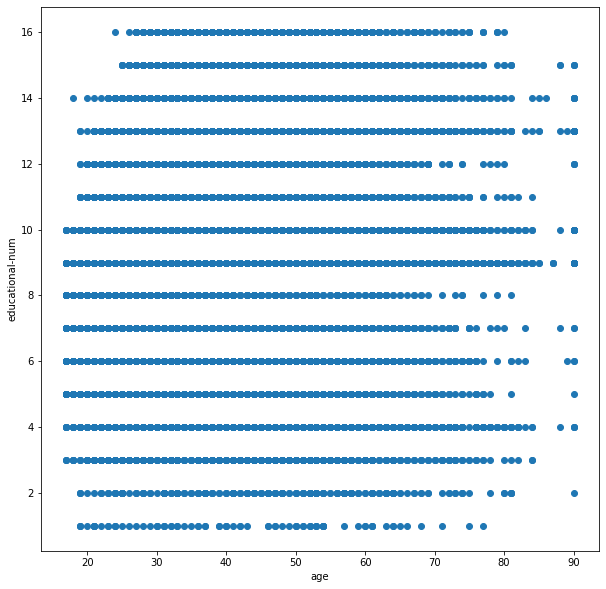

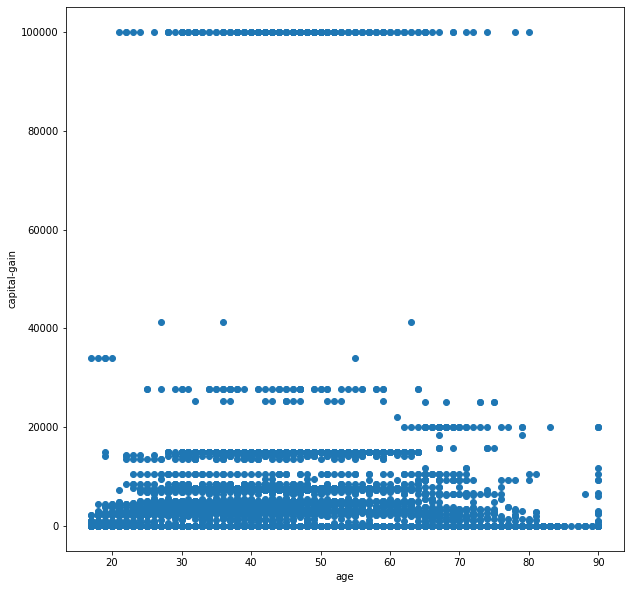

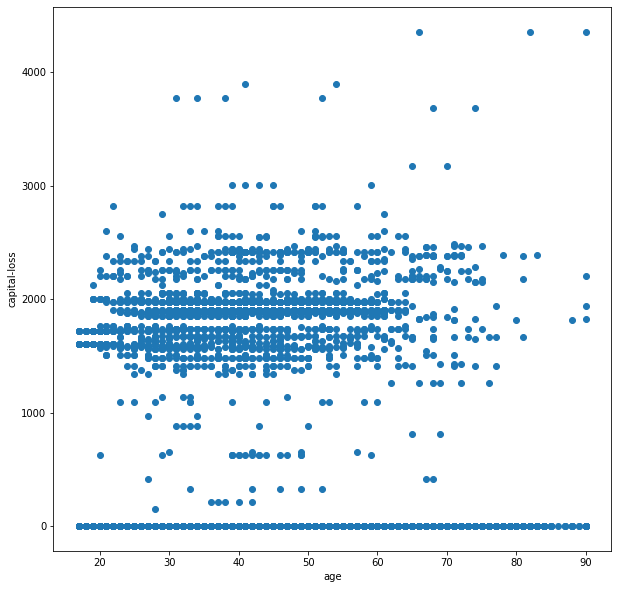

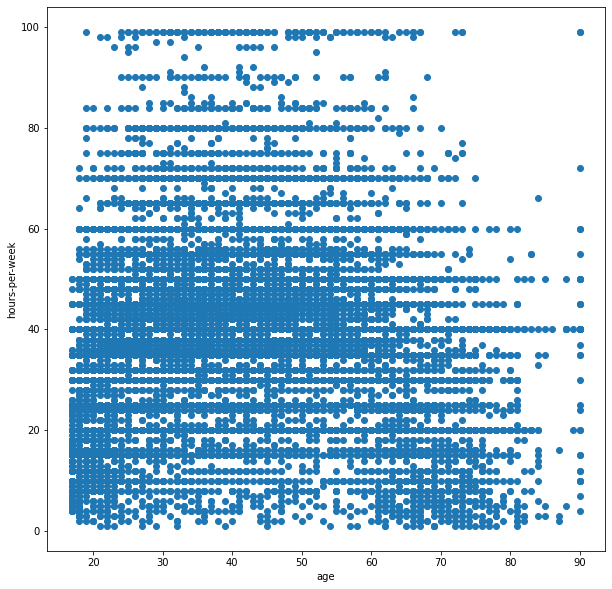

In [46]:

for i in num_var:
    plt.figure(figsize=(10,10))
    plt.xlabel('age')
    plt.ylabel(i)
    x=df['age']
    y=df[i]
    plt.scatter(x,y)

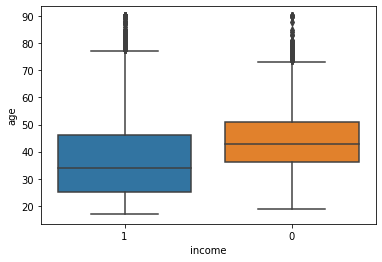

In [47]:
sns.boxplot(x='income',y='age',data=df)

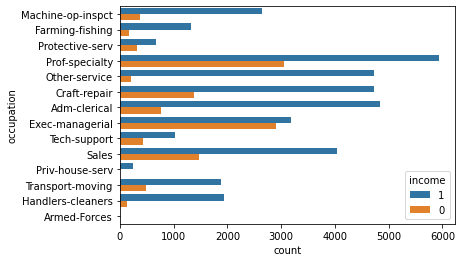

In [48]:
sns.countplot(y="occupation", hue="income",data=df)

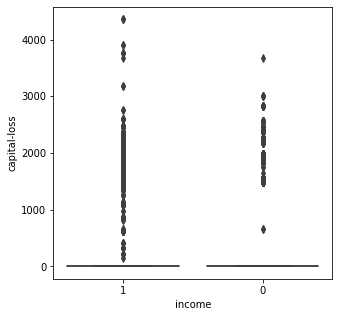

In [49]:
plt.figure(figsize=(5,5))
sns.boxplot(x="income", y="capital-loss", data=df)
plt.show()

In [50]:
def outlier_removal(feature):
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  sns.boxplot(feature)
  plt.title("Box Plot before median imputation")
  #plt.show()
  outlier(feature)
  q1 = feature.quantile(0.25)
  q3 = feature.quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  med = np.median(feature)
  m = np.mean(feature)
  for i in feature:
      if i > Upper_tail or i < Lower_tail:
        feature = feature.replace(i, med)
              #feature = feature.replace(i, 0)
              #feature = feature.replace(i, m)
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,2)
  sns.boxplot(feature)
  plt.title("Box Plot after median imputation")
  plt.show() 
  outlier(feature)

 outliers for given column  are: [444554, 432824, 465326, 445382, 479296, 428420, 456736, 537222, 513100, 447488, 512864, 500068, 446894, 599057, 479179, 471990, 457162, 455379, 542610, 479600, 448026, 437200, 419984, 652784, 573446, 453233, 662460, 426589, 629900, 499971, 450770, 481987, 420040, 478373, 486194, 509364, 632733, 504725, 560313, 651702, 644278, 535852, 445758, 452353, 475775, 455469, 522241, 427744, 420526, 473206, 427541, 581128, 444725, 608881, 490871, 430151, 431245, 451019, 430336, 433602, 437994, 436431, 914061, 624006, 510072, 484475, 505365, 593246, 714597, 418901, 816750, 491214, 446724, 552529, 454717, 425622, 575172, 475322, 622192, 420040, 566066, 493732, 427437, 427320, 614113, 445365, 472517, 459556, 548568, 565769, 429832, 424988, 426350, 789600, 424340, 447144, 864960, 497414, 471876, 723746, 427422, 421837, 692831, 535869, 433624, 638116, 467936, 698039, 427812, 472861, 449101, 677398, 464621, 547931, 497039, 451742, 420081, 460322, 666014, 474568, 452640

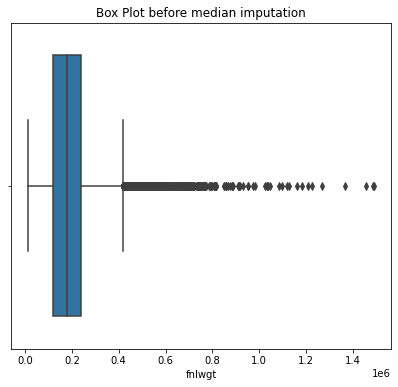

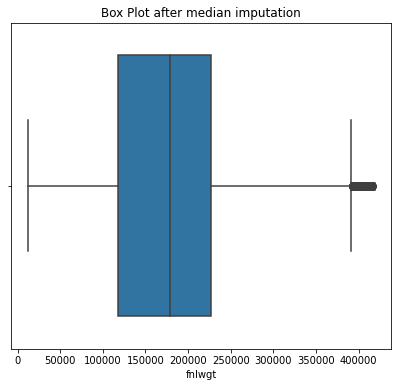

 outliers for given column  are: [403681.0, 411047.0, 411273.0, 413930.0, 400074.0, 416165.0, 410034.0, 403107.0, 394708.0, 409173.0, 399705.0, 402230.0, 400943.0, 391937.0, 403965.0, 408988.0, 415578.0, 392812.0, 391074.0, 409246.0, 398874.0, 398959.0, 392167.0, 394690.0, 400061.0, 412379.0, 402718.0, 405601.0, 398931.0, 407714.0, 408012.0, 391114.0, 409189.0, 410199.0, 403489.0, 401473.0, 403107.0, 391585.0, 398220.0, 393962.0, 398130.0, 394356.0, 408318.0, 402124.0, 402771.0, 391349.0, 399123.0, 409464.0, 392668.0, 413870.0, 395297.0, 405281.0, 403471.0, 403118.0, 404661.0, 391936.0, 398988.0, 398019.0, 409172.0, 402089.0, 413846.0, 408328.0, 393673.0, 408208.0, 414910.0, 401069.0, 393673.0, 393122.0, 397346.0, 393673.0, 410114.0, 396722.0, 411604.0, 406518.0, 410351.0, 409815.0, 402522.0, 415755.0, 396099.0, 393965.0, 417227.0, 405177.0, 398480.0, 403121.0, 394191.0, 395206.0, 416103.0, 416745.0, 411595.0, 405713.0, 400535.0, 393456.0, 397752.0, 416506.0, 417543.0, 401134.0, 402771

In [51]:
outlier_removal(df['fnlwgt'])

 outliers for given column  are: [79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]
No.of outliers are: 216


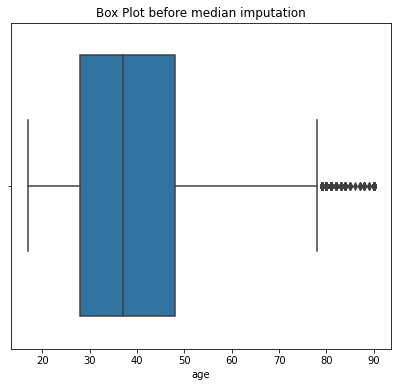

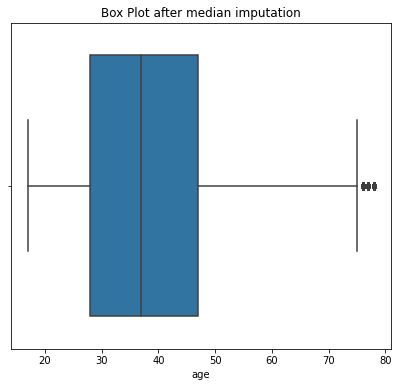

 outliers for given column  are: [77, 77, 78, 77, 76, 78, 77, 76, 77, 76, 76, 77, 77, 77, 76, 76, 76, 77, 77, 77, 77, 77, 76, 78, 76, 77, 77, 76, 77, 78, 76, 77, 78, 76, 76, 76, 76, 77, 78, 77, 78, 77, 76, 78, 76, 77, 78, 76, 76, 76, 77, 76, 77, 78, 78, 76, 77, 77, 76, 76, 77, 76, 78, 76, 76, 77, 76, 77, 78, 76, 76, 77, 76, 77, 76, 76, 76, 76, 77, 78, 76, 76, 78, 78, 77, 77, 76, 78, 77, 76, 77, 77, 78, 78, 76, 77, 78, 77, 77, 76, 76, 78, 76, 76, 78, 76, 76, 77, 76, 77, 78, 77, 78, 77, 76, 76, 78, 76, 78, 77, 78, 76, 78, 76, 76, 76, 77, 77, 76, 77, 76, 76, 77, 76, 76, 77, 78, 77, 76, 76, 76, 77, 76, 77, 77, 77, 76, 78, 76, 76, 78, 76, 76, 76, 78, 78, 78]
No.of outliers are: 157
 outliers for given column  are: [444554, 432824, 465326, 445382, 479296, 428420, 456736, 537222, 513100, 447488, 512864, 500068, 446894, 599057, 479179, 471990, 457162, 455379, 542610, 479600, 448026, 437200, 419984, 652784, 573446, 453233, 662460, 426589, 629900, 499971, 450770, 481987, 420040, 478373, 486194, 

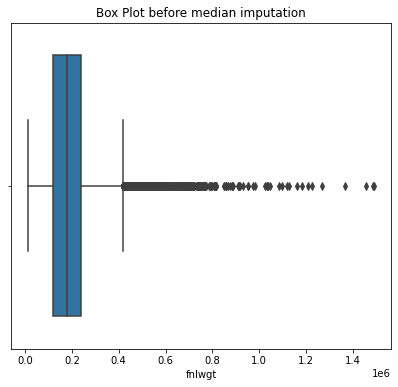

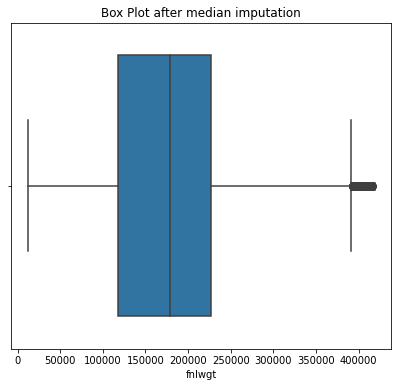

 outliers for given column  are: [403681.0, 411047.0, 411273.0, 413930.0, 400074.0, 416165.0, 410034.0, 403107.0, 394708.0, 409173.0, 399705.0, 402230.0, 400943.0, 391937.0, 403965.0, 408988.0, 415578.0, 392812.0, 391074.0, 409246.0, 398874.0, 398959.0, 392167.0, 394690.0, 400061.0, 412379.0, 402718.0, 405601.0, 398931.0, 407714.0, 408012.0, 391114.0, 409189.0, 410199.0, 403489.0, 401473.0, 403107.0, 391585.0, 398220.0, 393962.0, 398130.0, 394356.0, 408318.0, 402124.0, 402771.0, 391349.0, 399123.0, 409464.0, 392668.0, 413870.0, 395297.0, 405281.0, 403471.0, 403118.0, 404661.0, 391936.0, 398988.0, 398019.0, 409172.0, 402089.0, 413846.0, 408328.0, 393673.0, 408208.0, 414910.0, 401069.0, 393673.0, 393122.0, 397346.0, 393673.0, 410114.0, 396722.0, 411604.0, 406518.0, 410351.0, 409815.0, 402522.0, 415755.0, 396099.0, 393965.0, 417227.0, 405177.0, 398480.0, 403121.0, 394191.0, 395206.0, 416103.0, 416745.0, 411595.0, 405713.0, 400535.0, 393456.0, 397752.0, 416506.0, 417543.0, 401134.0, 402771

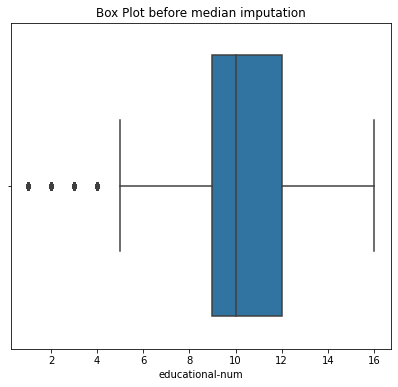

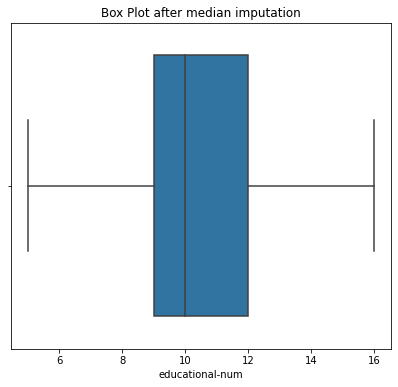

 outliers for given column  are: []
No.of outliers are: 0
 outliers for given column  are: [7688, 3103, 6418, 3103, 7298, 7688, 3908, 14084, 3103, 5178, 15024, 15024, 99999, 7688, 5178, 2597, 7688, 15024, 2907, 4650, 15024, 6497, 7688, 15024, 1055, 5013, 4650, 3103, 15024, 27828, 3103, 4934, 4064, 15024, 3674, 2174, 10605, 99999, 5178, 99999, 3418, 1055, 99999, 114, 2580, 3411, 2174, 2907, 4508, 27828, 4386, 15024, 15024, 2174, 5178, 8614, 7298, 3103, 13550, 2907, 5013, 6497, 7298, 7298, 7298, 7298, 15024, 1055, 15024, 6849, 2463, 7688, 5013, 99999, 2580, 2174, 99999, 3137, 2885, 2964, 7298, 1471, 5013, 5178, 4064, 10566, 2463, 2354, 7688, 1424, 99999, 5178, 1455, 7688, 7688, 3325, 3103, 4416, 15024, 27828, 25236, 3674, 3137, 99999, 8614, 594, 2105, 7298, 4787, 2829, 401, 7298, 4865, 15024, 15024, 1264, 15024, 6849, 15024, 7298, 7688, 1506, 99999, 4386, 99999, 99999, 5013, 4650, 3908, 594, 4386, 7688, 15024, 99999, 27828, 10520, 3103, 2354, 7298, 15024, 4934, 15024, 5178, 3103, 99999, 

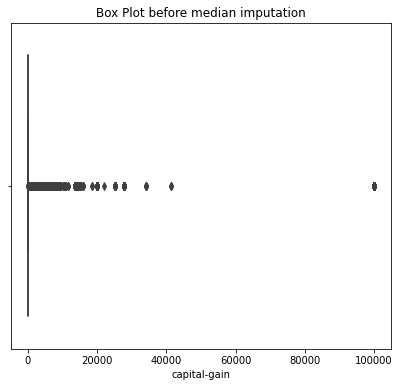

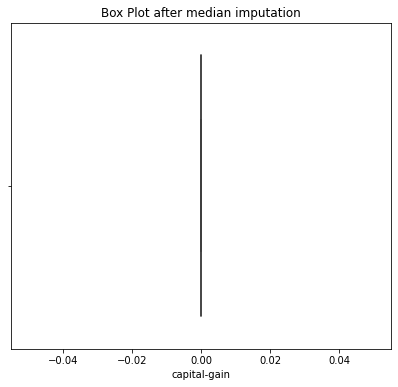

 outliers for given column  are: []
No.of outliers are: 0
 outliers for given column  are: [1721, 1876, 2415, 1887, 1887, 625, 1887, 1887, 1977, 2057, 1429, 1590, 2057, 1721, 1887, 1485, 1485, 1977, 1887, 1721, 1887, 2051, 2377, 1672, 1628, 1902, 1672, 1602, 1902, 1590, 1977, 1741, 1887, 2444, 1876, 1902, 1408, 1902, 2001, 2001, 2415, 2042, 1740, 1876, 1825, 1902, 1887, 1977, 1887, 1902, 1887, 1902, 2415, 1848, 1719, 3004, 1590, 1977, 1887, 625, 1977, 2001, 1902, 1977, 2179, 1902, 1573, 1429, 2205, 1258, 1977, 2339, 1887, 2339, 1726, 2258, 1672, 1590, 1887, 1340, 2415, 1602, 1504, 1887, 2415, 2559, 1977, 1848, 2258, 1902, 1887, 1668, 1974, 1977, 1741, 2205, 1980, 2051, 2377, 1902, 2444, 1564, 1408, 1902, 1977, 2547, 1902, 2002, 2057, 2001, 1977, 1977, 1628, 1902, 1876, 1848, 1719, 1669, 1902, 1902, 2339, 1902, 2339, 1902, 1887, 1902, 1887, 1719, 1429, 2001, 1485, 1902, 1980, 1504, 1887, 1902, 1977, 1617, 1741, 2051, 2205, 1980, 1902, 323, 1887, 2205, 1721, 1602, 1573, 1977, 2415, 3175,

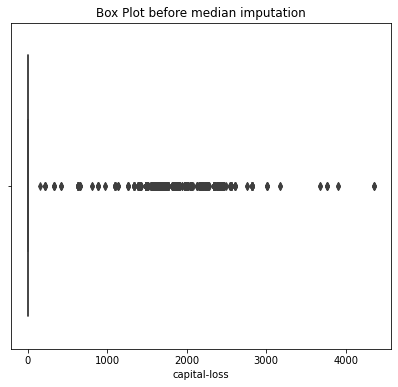

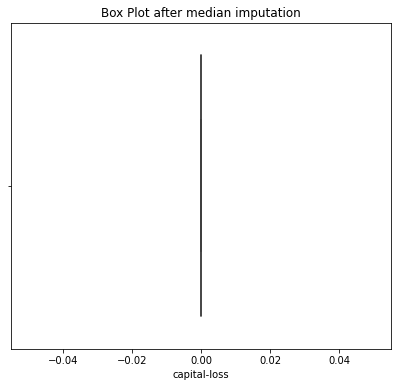

 outliers for given column  are: []
No.of outliers are: 0
 outliers for given column  are: [30, 30, 32, 10, 25, 30, 20, 6, 90, 20, 54, 60, 32, 18, 20, 24, 60, 54, 60, 20, 30, 10, 56, 10, 25, 20, 10, 18, 28, 16, 28, 20, 24, 60, 25, 30, 25, 60, 60, 22, 55, 30, 30, 30, 30, 14, 32, 20, 25, 30, 16, 25, 60, 55, 8, 55, 54, 20, 55, 12, 32, 32, 30, 60, 28, 60, 12, 32, 20, 70, 15, 20, 25, 30, 20, 75, 24, 60, 25, 55, 55, 32, 60, 16, 60, 84, 60, 25, 15, 60, 20, 55, 80, 30, 12, 84, 80, 60, 25, 25, 70, 60, 8, 68, 10, 15, 99, 55, 60, 16, 20, 25, 65, 55, 24, 70, 25, 30, 20, 20, 55, 5, 60, 60, 20, 55, 65, 60, 20, 10, 75, 20, 32, 28, 17, 30, 28, 60, 60, 55, 60, 10, 10, 65, 18, 60, 72, 12, 60, 30, 60, 20, 60, 60, 25, 60, 25, 8, 60, 54, 65, 30, 80, 30, 20, 28, 55, 55, 60, 56, 30, 30, 53, 10, 60, 30, 10, 25, 25, 20, 20, 20, 25, 55, 20, 32, 10, 29, 32, 75, 24, 20, 20, 70, 55, 55, 30, 25, 10, 80, 60, 16, 25, 65, 60, 60, 96, 25, 20, 55, 30, 28, 60, 55, 28, 21, 8, 60, 60, 15, 20, 10, 30, 25, 90, 15, 5, 16, 25,

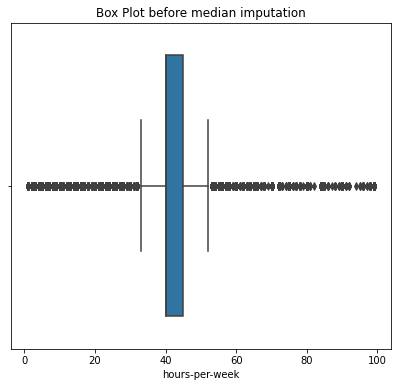

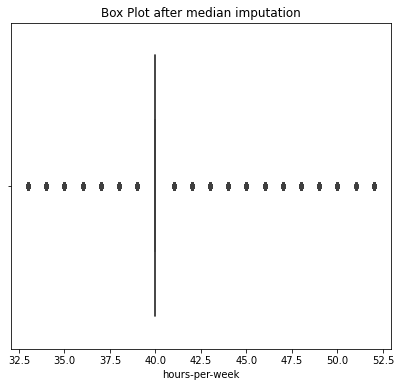

 outliers for given column  are: [50, 39, 35, 48, 50, 45, 47, 35, 43, 35, 38, 50, 50, 50, 50, 45, 36, 50, 50, 50, 50, 50, 48, 45, 50, 50, 50, 50, 44, 35, 39, 48, 50, 41, 48, 35, 45, 50, 45, 45, 45, 45, 33, 45, 45, 37, 50, 38, 45, 50, 45, 50, 37, 45, 50, 50, 45, 50, 50, 38, 45, 38, 35, 50, 50, 35, 50, 50, 50, 35, 50, 38, 35, 35, 52, 50, 38, 48, 48, 38, 38, 45, 45, 35, 42, 50, 42, 50, 45, 42, 50, 48, 45, 50, 50, 50, 45, 50, 44, 45, 35, 35, 35, 37, 50, 50, 45, 45, 36, 45, 45, 35, 50, 37, 50, 50, 48, 44, 42, 35, 35, 39, 38, 50, 50, 35, 35, 36, 35, 33, 45, 36, 38, 50, 45, 50, 50, 35, 50, 50, 37, 45, 50, 50, 45, 50, 35, 50, 50, 35, 37, 48, 35, 50, 45, 45, 45, 50, 35, 50, 35, 50, 48, 38, 35, 50, 45, 37, 52, 42, 50, 45, 35, 50, 50, 52, 52, 35, 45, 50, 45, 50, 37, 48, 48, 50, 50, 45, 50, 50, 50, 50, 52, 45, 50, 35, 50, 45, 33, 50, 33, 35, 35, 50, 43, 45, 45, 45, 50, 48, 38, 37, 35, 45, 46, 35, 50, 50, 35, 48, 35, 39, 50, 50, 45, 50, 35, 45, 44, 50, 45, 50, 44, 38, 38, 35, 36, 50, 50, 48, 48, 45

In [52]:
df2=[outlier_removal(df[i]) for i in (num_var) ]


In [56]:
upper_boundary=df["age"].mean()+3*df["age"].std()
lower_boundary=df["age"].mean()-3*df["age"].std()
print(lower_boundary), print(upper_boundary),print(df["age"].mean())

-2.4879443645679373
79.77511524209137
38.64358543876172


(None, None, None)

In [59]:
IQR =df.age.quantile(0.75)-df.age.quantile(0.25)
IQR

20.0

In [60]:
lower_bridge=df["age"].quantile(0.25)-(IQR*1.5)
Upper_bridge=df["age"].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(Upper_bridge)

-2.0
78.0


(None, None)

In [61]:
### Extreme outliers
lower_bridge=df["age"].quantile(0.25)-(IQR*3)
Upper_bridge=df["age"].quantile(0.75)+(IQR*3)
print(lower_bridge),print(Upper_bridge)

-32.0
108.0


(None, None)

In [62]:
data=df.copy()

In [63]:
data.loc[data["age"]>=80,"age"]=80

In [64]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,1
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,1
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,0
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,0
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,1


AxesSubplot(0.125,0.125;0.775x0.755)
 outliers for given column  are: [79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]
No.of outliers are: 216


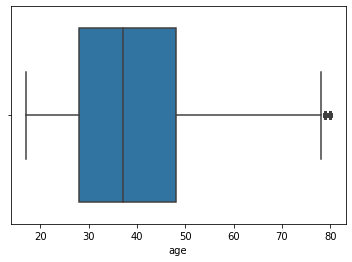

In [66]:
print(sns.boxplot(data["age"]))
outlier(df['age'])

In [69]:
data["age"].describe()


count    48842.000000
mean        38.626797
std         13.654697
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         80.000000
Name: age, dtype: float64

In [70]:
upper_boundary=df["age"].mean()+2.5*df["age"].std()
lower_boundary=df["age"].mean()-2.5*df["age"].std()
print(lower_boundary), print(upper_boundary),print(df["age"].mean())

4.367310602653667
72.91986027486976
38.64358543876172


(None, None, None)

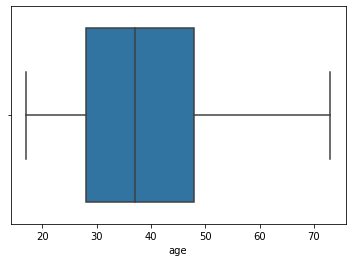

In [73]:
data1=data.copy()

data1.loc[data1["age"]>=73,"age"]=73


In [81]:
df['income'].value_counts(normalize = True)
df['gender'].value_counts(normalize=True)
df_ft=pd.get_dummies(df, columns=catg_var)
df_ft

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,marital-status_0,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,occupation_0,occupation_1,occupation_2,...,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,income_0,income_1
0,25,226802,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,28,336951,12,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,44,160323,10,7688,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,18,103497,10,0,0,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
48838,40,154374,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
48839,58,151910,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
48840,22,201490,9,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_ft), columns = df_ft.columns)
df_scaled

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,marital-status_0,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,occupation_0,occupation_1,occupation_2,...,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,income_0,income_1
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,-0.173795,-0.261940,-0.01431,0.575033,-0.189609,-0.293019,-0.205606,-0.02074,-0.171088,5.094580,-0.116769,-0.071294,-0.102621,-0.141219,-0.125387,-0.184093,-0.209896,-0.443406,-0.110957,-0.690988,-0.239853,-0.041258,-0.131803,-0.535289,-0.396417,-0.027534,-0.919604,-0.114128,1.424944,-0.179829,-0.179100,-0.360265,-0.017527,-0.378203,...,-0.041753,-0.05323,-0.045971,-0.030368,-0.056423,-0.051059,-0.027904,-0.065081,-0.03169,-0.042485,-0.039216,-0.004525,-0.02024,-0.024791,-0.019727,-0.055688,-0.034777,-0.027534,-0.046416,-0.046637,-0.043442,-0.021705,-0.140917,-0.03169,-0.021705,-0.030703,-0.077952,-0.042243,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,-0.560845,0.560845
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,-0.173795,-0.261940,-0.01431,0.575033,-0.189609,-0.293019,-0.205606,-0.02074,-0.171088,-0.196287,-0.116769,-0.071294,-0.102621,-0.141219,-0.125387,-0.184093,-0.209896,-0.443406,-0.110957,1.447204,-0.239853,-0.041258,-0.131803,-0.535289,-0.396417,-0.027534,1.087425,-0.114128,-0.701782,-0.179829,-0.179100,-0.360265,-0.017527,-0.378203,...,-0.041753,-0.05323,-0.045971,-0.030368,-0.056423,-0.051059,-0.027904,-0.065081,-0.03169,-0.042485,-0.039216,-0.004525,-0.02024,-0.024791,-0.019727,-0.055688,-0.034777,-0.027534,-0.046416,-0.046637,-0.043442,-0.021705,-0.140917,-0.03169,-0.021705,-0.030703,-0.077952,-0.042243,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,-0.560845,0.560845
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,-0.173795,3.817672,-0.01431,-1.739029,-0.189609,-0.293019,-0.205606,-0.02074,-0.171088,-0.196287,-0.116769,-0.071294,-0.102621,-0.141219,-0.125387,5.432051,-0.209896,-0.443406,-0.110957,-0.690988,-0.239853,-0.041258,-0.131803,-0.535289,-0.396417,-0.027534,1.087425,-0.114128,-0.701782,-0.179829,-0.179100,-0.360265,-0.017527,-0.378203,...,-0.041753,-0.05323,-0.045971,-0.030368,-0.056423,-0.051059,-0.027904,-0.065081,-0.03169,-0.042485,-0.039216,-0.004525,-0.02024,-0.024791,-0.019727,-0.055688,-0.034777,-0.027534,-0.046416,-0.046637,-0.043442,-0.021705,-0.140917,-0.03169,-0.021705,-0.030703,-0.077952,-0.042243,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,1.783024,-1.783024
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,-0.173795,-0.261940,-0.01431,0.575033,-0.189609,-0.293019,-0.205606,-0.02074,-0.171088,-0.196287,-0.116769,-0.071294,-0.102621,-0.141219,-0.125387,-0.184093,-0.209896,-0.443406,-0.110957,-0.690988,-0.239853,-0.041258,-0.131803,1.868149,-0.396417,-0.027534,1.087425,-0.114128,-0.701782,-0.179829,-0.179100,-0.360265,-0.017527,-0.378203,...,-0.

In [85]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 

In [89]:
new_data = pd.read_csv("adult.csv")
le = LabelEncoder()
norm = Normalizer()
#Label encoding
for col in catg_var:
  new_data[col] = le.fit_transform(new_data[col])

new_data[num_var] = norm.fit_transform(new_data[num_var])
new_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.000110,4,1.000000,1,0.000031,4,7,3,2,1,0.000000,0.0,0.000176,39,0
1,0.000423,4,1.000000,11,0.000100,2,5,0,4,1,0.000000,0.0,0.000557,39,0
2,0.000083,2,1.000000,7,0.000036,2,11,0,4,1,0.000000,0.0,0.000119,39,1
3,0.000274,4,0.998852,15,0.000062,2,7,0,2,1,0.047898,0.0,0.000249,39,1
4,0.000174,0,1.000000,15,0.000097,4,0,3,4,0,0.000000,0.0,0.000290,39,0


In [93]:
X = new_data.drop(['income'], axis = 1)
y = new_data['income']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=25)

In [94]:
knn = KNeighborsClassifier() 
fit_knn = knn.fit(X_train, y_train) 
s_value = X_test[:1] 
print('Predicted class value is : {0}'.format(fit_knn.predict(s_value)))

Predicted class value is : [0]


In [96]:
distance_matrix = fit_knn.kneighbors_graph(s_value, mode = "distance")
inde = distance_matrix.nonzero() 
inde

(array([0, 0, 0, 0, 0], dtype=int32),
 array([26186, 18046,  7319, 28420,  5124], dtype=int32))

In [99]:
k_near_class = [y_train.iloc[val[1]] for val in zip(*distance_matrix.nonzero())]
k_near_class
print(fit_knn.predict_proba(s_value))
print(s_value)

[[1. 0.]]
            age  workclass  ...  hours-per-week  native-country
38440  0.000163          4  ...         0.00025              39

[1 rows x 14 columns]


In [100]:
dist = distance_matrix[distance_matrix.nonzero()] 
dist

matrix([[5.28450151e-05, 7.82244005e-05, 9.68797927e-05, 1.12973276e-04,
         1.87364323e-04]])

In [101]:
k_near = pd.DataFrame()
for val in zip(*distance_matrix.nonzero()):
    k_near = k_near.append(X_train.iloc[val[1]], ignore_index = True)
k_near

,age,capital-gain,capital-loss,education,educational-num,fnlwgt,gender,hours-per-week,marital-status,native-country,occupation,race,relationship,workclass
0,0.000135,0.0,0.0,9.0,0.000067,1.0,1.0,0.000208,4.0,39.0,8.0,4.0,3.0,4.0
1,0.000118,0.0,0.0,9.0,0.000061,1.0,1.0,0.000189,4.0,39.0,8.0,4.0,3.0,4.0
2,0.000102,0.0,0.0,9.0,0.000058,1.0,1.0,0.000178,4.0,39.0,8.0,4.0,3.0,4.0
3,0.000100,0.0,0.0,9.0,0.000052,1.0,1.0,0.000161,4.0,39.0,8.0,4.0,3.0,4.0
4,0.000104,0.0,0.0,9.0,0.000054,1.0,1.0,0.000075,4.0,39.0,8.0,4.0,3.0,4.0


In [102]:
fit_knn.score(X_test, y_test)

0.817843404888944